In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [17]:
# Download the train dataset
dataframe_train = pd.read_csv('time-series-anomaly-detection-knowledge-main/time-series-anomaly-detection-knowledge-main/data_students/Earthquakes/0.5/train.csv', header=0)
raw_data_train = dataframe_train.values
dataframe_train.head()

,1,2,3,4,5,6,7,8,9,10,...,504,505,506,507,508,509,510,511,512,label
0,-0.366197,-0.366197,3.048759,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,2.424647,...,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,-0.366197,0
1,-0.530570,-0.530570,-0.530570,-0.530570,-0.530570,-0.530570,-0.530570,1.552224,-0.530570,-0.530570,...,-0.530570,-0.530570,-0.530570,1.487426,-0.530570,-0.530570,-0.530570,-0.530570,-0.530570,1
2,2.286273,2.001334,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,...,2.043547,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,-0.415371,0
3,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,-0.349704,...,-0.349704,-0.349704,-0.349704,-0.349704,2.522732,-0.349704,-0.349704,-0.349704,-0.349704,0
4,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,...,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,-0.490923,0


In [13]:
# Download the test dataset
dataframe_test = pd.read_csv('time-series-anomaly-detection-knowledge-main/time-series-anomaly-detection-knowledge-main/data_students/Earthquakes/0.5/test.csv', header=0)
raw_data_test = dataframe_test.values
dataframe_test.head()

,1,2,3,4,5,6,7,8,9,10,...,504,505,506,507,508,509,510,511,512,label
0,-0.468873,2.748038,1.626291,-0.468873,-0.468873,-0.468873,-0.468873,-0.468873,1.663373,-0.468873,...,1.617020,-0.468873,2.062011,-0.468873,-0.468873,-0.468873,-0.468873,1.635561,-0.468873,1
1,-0.504030,-0.504030,-0.504030,-0.504030,-0.504030,1.421887,-0.504030,-0.504030,-0.504030,-0.504030,...,-0.504030,1.431328,1.903366,-0.504030,1.440768,1.554058,-0.504030,-0.504030,-0.504030,1
2,-0.571091,1.575378,-0.571091,-0.571091,-0.571091,-0.571091,-0.571091,-0.571091,-0.571091,1.841469,...,-0.571091,-0.571091,-0.571091,-0.571091,-0.571091,1.681814,-0.571091,-0.571091,2.284954,1
3,-0.453334,-0.453334,-0.453334,-0.453334,-0.453334,-0.453334,2.002988,-0.453334,-0.453334,-0.453334,...,1.847524,-0.453334,-0.453334,-0.453334,1.816432,-0.453334,-0.453334,-0.453334,-0.453334,1
4,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,...,-0.447201,-0.447201,1.727518,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,-0.447201,1


In [11]:
# The last element contains the labels
train_labels = raw_data_train[:, -1]
#print(train_labels)
test_labels = raw_data_test[:, -1]
#print(test_labels)

# The other data points are the wine data
train_data = raw_data_train[:, 0:-1]
test_data = raw_data_test[:, 0:-1]
print(type(train_data))

<class 'numpy.ndarray'>


In [51]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
#test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
#test_data = tf.cast(test_data, tf.float32)
print(train_data)

tf.Tensor(
[[0.23306939 0.23468924 0.23306939 ... 0.23468924 0.23468924 0.23468924]
 [0.05109634 0.05093766 0.05093766 ... 0.05093766 0.05093766 0.05093766]
 [0.21841292 0.21982166 0.21982166 ... 0.21841292 0.21841292 0.21841292]
 ...
 [0.21984042 0.21843378 0.21843378 ... 0.21984042 0.21984042 0.21984042]
 [0.02883462 0.02629156 0.0255795  ... 0.06464083 0.06464083 0.06464083]
 [0.04967303 0.04993718 0.04993718 ... 0.04993718 0.04993718 0.04993718]], shape=(951, 152), dtype=float32)


In [44]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#print(train_labels)
normal_train_data = train_data[train_labels]
#print(normal_train_data)
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
print(anomalous_train_data)
anomalous_test_data = test_data[~test_labels]

tf.Tensor(
[[0.23306939 0.23468924 0.23306939 ... 0.23468924 0.23468924 0.23468924]
 [0.05109634 0.05093766 0.05093766 ... 0.05093766 0.05093766 0.05093766]
 [0.21841292 0.21982166 0.21982166 ... 0.21841292 0.21841292 0.21841292]
 ...
 [0.21984042 0.21843378 0.21843378 ... 0.21984042 0.21984042 0.21984042]
 [0.02883462 0.02629156 0.0255795  ... 0.06464083 0.06464083 0.06464083]
 [0.04967303 0.04993718 0.04993718 ... 0.04993718 0.04993718 0.04993718]], shape=(903, 152), dtype=float32)


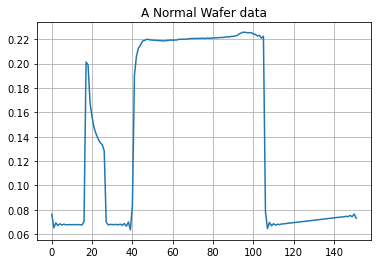

In [48]:
plt.grid()
plt.plot(np.arange(152), normal_train_data[1])
plt.title("A Normal Wafer data")
plt.show()

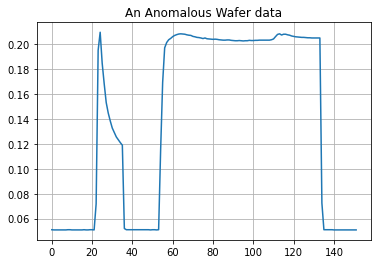

In [49]:
plt.grid()
plt.plot(np.arange(152), anomalous_train_data[1])
plt.title("An Anomalous Wafer data")
plt.show()

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(152, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

In [11]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.3157 - val_loss: 0.3155
Epoch 2/20
1/1 [==============================] - 0s 194ms/step - loss: 0.3152 - val_loss: 0.3149
Epoch 3/20
1/1 [==============================] - 0s 47ms/step - loss: 0.3146 - val_loss: 0.3142
Epoch 4/20
1/1 [==============================] - 0s 47ms/step - loss: 0.3139 - val_loss: 0.3135
Epoch 5/20
1/1 [==============================] - 0s 31ms/step - loss: 0.3131 - val_loss: 0.3126
Epoch 6/20
1/1 [==============================] - 0s 47ms/step - loss: 0.3122 - val_loss: 0.3116
Epoch 7/20
1/1 [==============================] - 0s 38ms/step - loss: 0.3112 - val_loss: 0.3105
Epoch 8/20
1/1 [==============================] - 0s 58ms/step - loss: 0.3101 - val_loss: 0.3092
Epoch 9/20
1/1 [==============================] - 0s 42ms/step - loss: 0.3088 - val_loss: 0.3078
Epoch 10/20
1/1 [==============================] - 0s 31ms/step - loss: 0.3074 - val_loss: 0.3063
Epoch 11/20
1/1 [=============

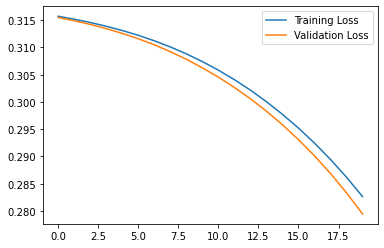

In [12]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

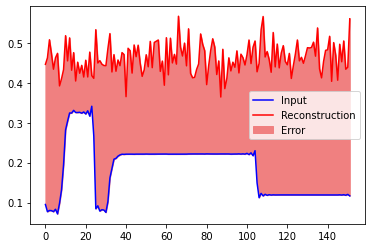

In [13]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(152), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

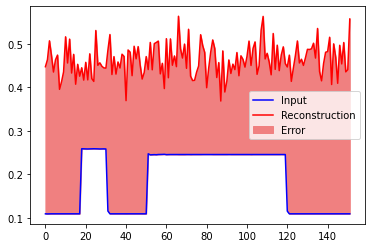

In [14]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(152), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

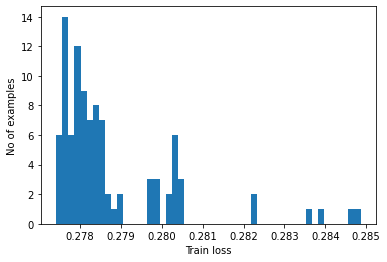

In [15]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [16]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.28029367


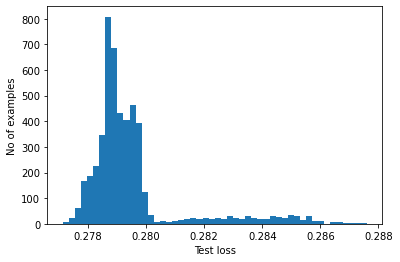

In [17]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [18]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))